# InclusivePalette

#### Developer Luan Rabelo - @lprabelo

In [1]:
import os
import sys
import colorsys
import random

class TerminalColors:
    Header      = '\033[95m'
    Blue        = '\033[94m'
    Cyan        = '\033[96m'
    Green       = '\033[92m'
    Warning     = '\033[93m'
    Fail        = '\033[91m'
    End         = '\033[0m'
    Bold        = '\033[1m'
    Underline   = '\033[4m'

try:
    import matplotlib.pyplot as plt
    print(f"{TerminalColors.Green}Module 'matplotlib' found and imported!{TerminalColors.End}")
except ImportError:
    print(f"{TerminalColors.Fail}Module 'matplotlib' not found, please install it with: python3 -m pip install -U matplotlib{TerminalColors.End}")
    print(f"{TerminalColors.Warning}{TerminalColors.Underline}Do you want to install it now? (yes/no){TerminalColors.End}")
    Choice = str(input())
    if Choice.lower() == 'y' or Choice.lower() == 'yes':
        os.system('python3 -m pip install -U matplotlib')
        print(f"{TerminalColors.Green}Module 'matplotlib' installed successfully!{TerminalColors.End}")
        try:
            import matplotlib.pyplot as plt
            print(f"{TerminalColors.Green}Module 'matplotlib' found and imported!{TerminalColors.End}")
        except ImportError:
            print(f"{TerminalColors.Fail}Module 'matplotlib' not found, please reinstall it with: python3 -m pip install -U pycirclize{TerminalColors.End}")
            sys.exit()
    else:
        print(f"{TerminalColors.Fail}Installation 'matplotlib' aborted!{TerminalColors.End}")

Module 'matplotlib' found and imported!


In [2]:
def ColorsForColorBlind(seed: int):
    '''
    Developed by: Luan Rabelo and ChatGPT
    '''
    Red     = random.randint(50, 205) # Red Color 
    Green   = random.randint(50, 205) # Green Color
    Blue    = random.randint(50, 205) # Blue Color
    # Convert RGB values to HSV
    RedColor, GreenColor, BlueColor = colorsys.hsv_to_rgb(Red*seed, Green, Blue)
    # Adjust the color for color blindness using the following formula
    # Source: https://ixora.io/projects/colorblindness/color-blindness-simulation-research/
    NewRed      = 0.018 * GreenColor + 0.005 * BlueColor 
    NewGreen    = 0.370 * RedColor + 0.75 * BlueColor
    NewBlue     = 0.100 * RedColor + 0.10 * GreenColor
    # Converter RGB para Hexadecimal
    HexColor = "#{0:02x}{1:02x}{2:02x}".format(int(NewRed * 200), int(NewGreen * 200), int(NewBlue * 200))
    while len(HexColor) > 7:
        HexColor = str(HexColor[:-1]).replace("-", str(seed)).upper()
    return HexColor

In [3]:
for i in range(15):
    print(ColorsForColorBlind(seed=i))

#020F34
#11CA94
#2171E3
#31021A
#460F54
#51B236
#620E65
#7B1BA7
#811F24
#91559F
#101BCB
#11111D
#121B52
#131247
#149FB4


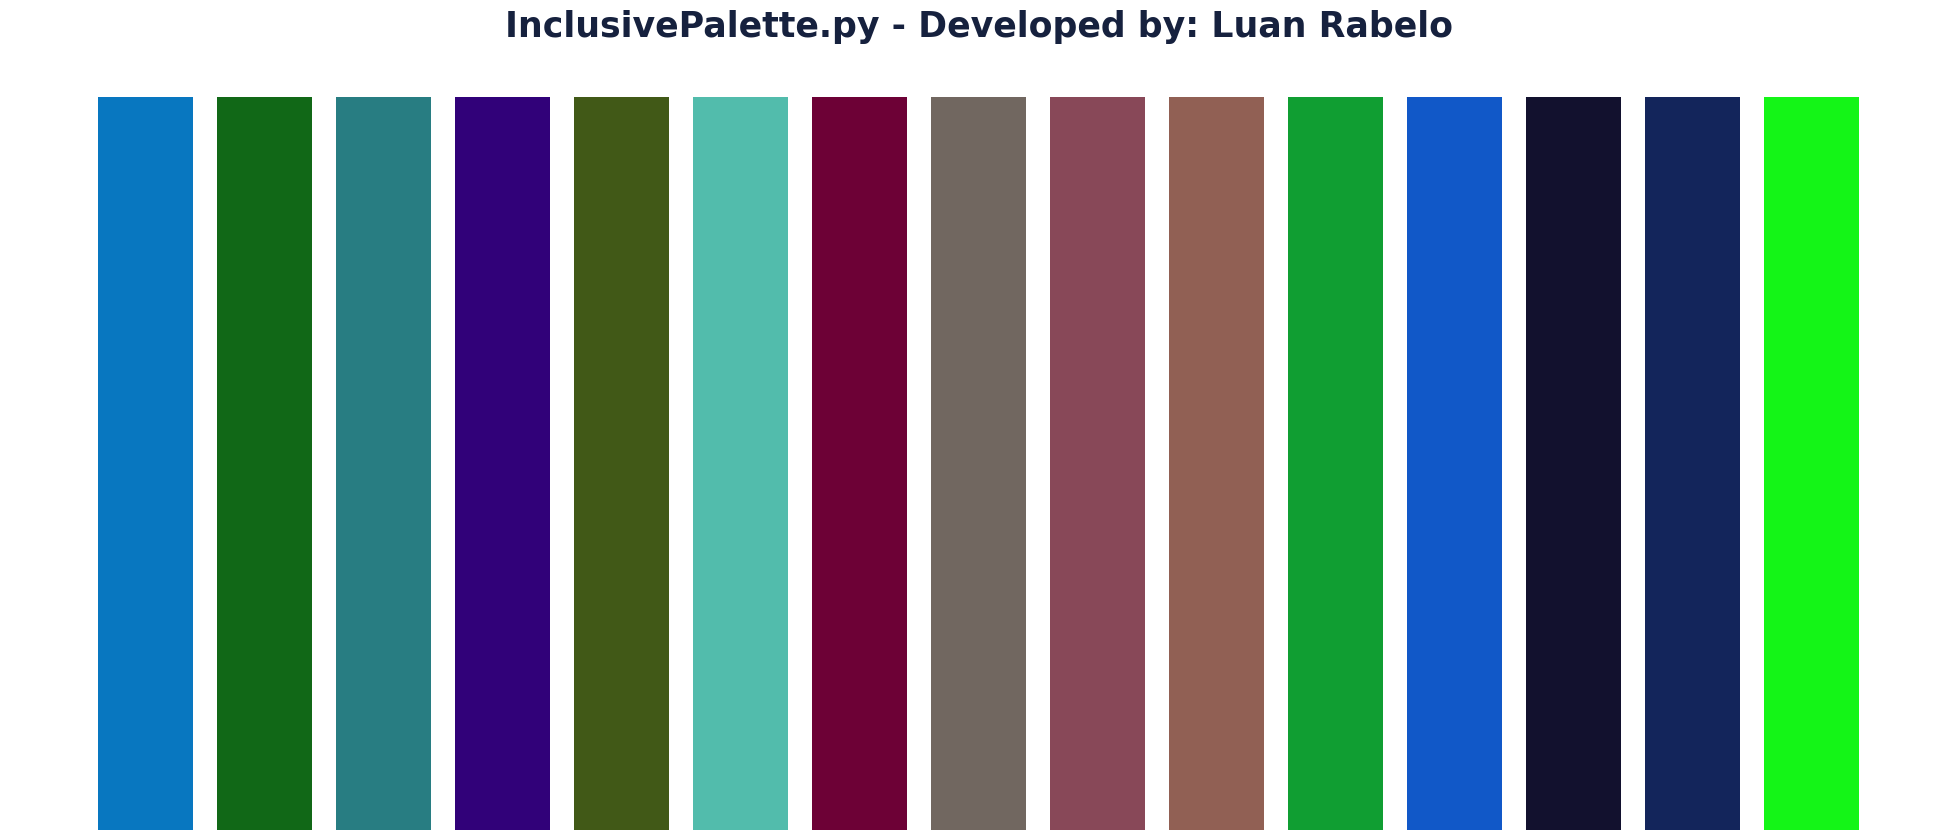

In [5]:
ColorsMap = [ColorsForColorBlind(i) for i in range(15)]
fig, ax = plt.subplots(figsize=(25, 10))
for i, c in enumerate(ColorsMap):
    ax.bar(i, 1, color=c)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('InclusivePalette.py - Developed by: Luan Rabelo', fontsize=25, fontweight='bold', color='#16213E', y=1.02)
plt.show()
fig.savefig('InclusivePalette.png', dpi=600, bbox_inches='tight')